# Polynomial Regression Analysis on Manufacturing Data

## Introduction
This notebook explores polynomial regression applied to the manufacturing dataset. Polynomial regression is a form of regression analysis where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. It can be useful for capturing the non-linear relationships in the data.

## Import Libraries
Start by importing all necessary libraries.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
# Load the dataset
df = pd.read_csv('manufacturing.csv')

# Display the first few rows of the dataframe
print(df.head())


   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


In [12]:
# Print a header for the info section
print("DataFrame Information:")
print("-" * 40)  # prints a line of dashes as a separator
# Display basic information about the dataframe
df.info()

# Add a line break for clarity
print("\n" + "-" * 40)

# Print a header for the description section
print("DataFrame Statistical Summary:")
print("-" * 40)  # prints a line of dashes as a separator
# Print statistical summary of the dataframe
print(df.describe())

# Add a line break for clarity
print("\n" + "-" * 40)

# Print a header for the missing values section
print("Missing Values in DataFrame:")
print("-" * 40)  # prints a line of dashes as a separator
# Check for missing values in each column
print(df.isnull().sum())

# Add a line break for clarity
print("\n" + "-" * 40)

# Handling missing values by dropping rows with any missing values
df_clean = df.dropna()
print("Rows with missing values have been removed.")

# Remove duplicates
df_clean = df_clean.drop_duplicates()
print("Duplicate rows have been removed.")

# Print a message indicating that the dataframe is ready for further processing
print("\nDataFrame is now clean and ready for further analysis.")

DataFrame Information:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB

----------------------------------------
DataFrame Statistical Summary:
----------------------------------------
       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
count       3957.000000     3957.000000             3957.000000   
mean         200.034704       14.815558             

Mean Squared Error: 15.027666515261242
R^2 Score: 0.9263893126590884


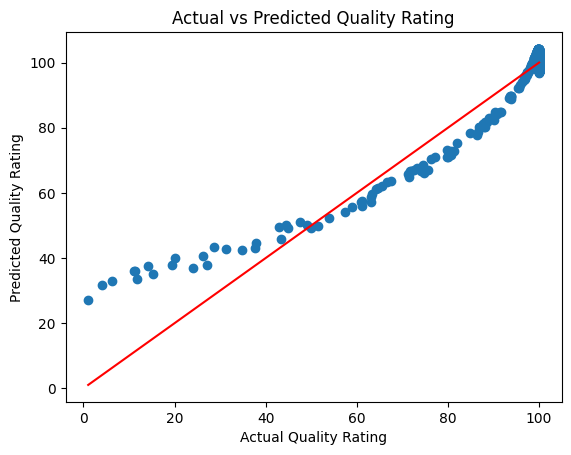

In [14]:

# Define the features and the target
X = df[['Temperature (°C)', 'Pressure (kPa)', 'Temperature x Pressure', 'Material Fusion Metric', 'Material Transformation Metric']]
y = df['Quality Rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, apply scaling (if you find it necessary after analysis)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform features into polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train_scaled)
X_poly_test = poly_features.transform(X_test_scaled)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the transformed polynomial features
model.fit(X_poly_train, y_train)

# Predict on the test data
y_pred = model.predict(X_poly_test)

# Calculate and print the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualization: Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality Rating')
plt.ylabel('Predicted Quality Rating')
plt.title('Actual vs Predicted Quality Rating')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()